
🔹 UNTUNED RANDOM FOREST
Accuracy: 0.48951048951048953
Weighted F1 Score: 0.4551951238554109
Classification Report:
               precision    recall  f1-score   support

           1       0.17      0.08      0.11        26
           2       0.53      0.72      0.61        75
           3       0.47      0.33      0.39        42

    accuracy                           0.49       143
   macro avg       0.39      0.38      0.37       143
weighted avg       0.45      0.49      0.46       143



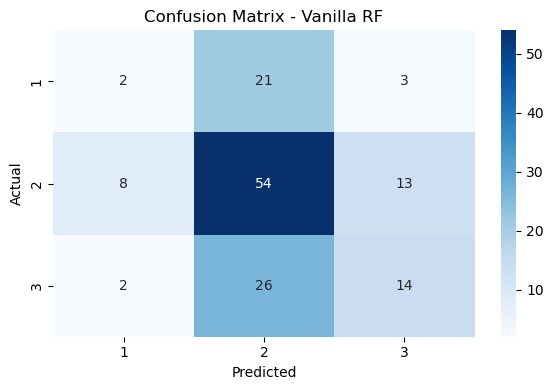

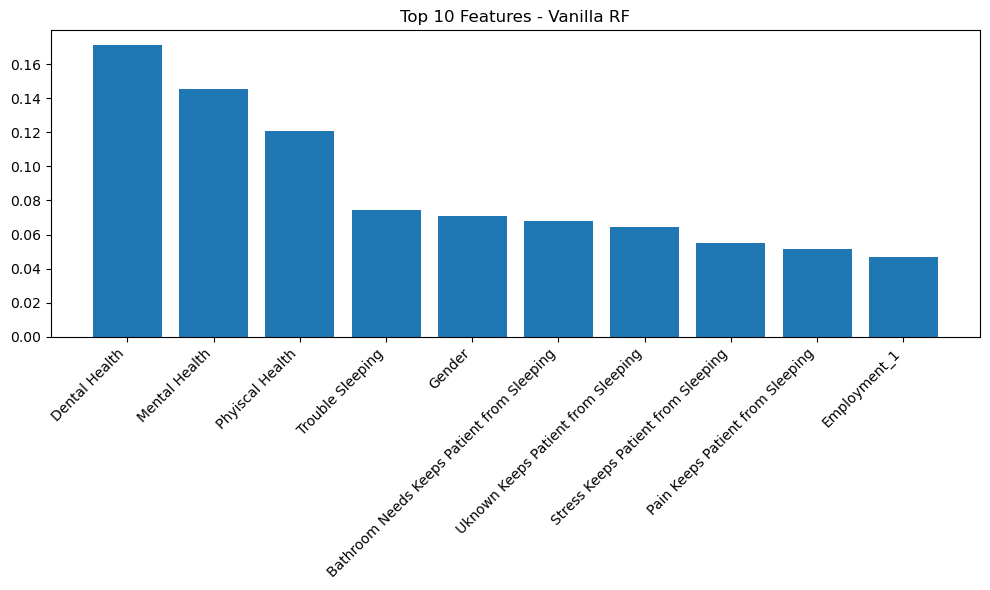


🟢 TUNED RANDOM FOREST (Model 2)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.4965034965034965
Weighted F1 Score: 0.4713544755619674
Macro F1 Score: 0.39832088827419015
Classification Report:
               precision    recall  f1-score   support

    1 Doctor       0.27      0.15      0.20        26
 2-3 Doctors       0.55      0.71      0.62        75
  4+ Doctors       0.45      0.33      0.38        42

    accuracy                           0.50       143
   macro avg       0.42      0.40      0.40       143
weighted avg       0.47      0.50      0.47       143



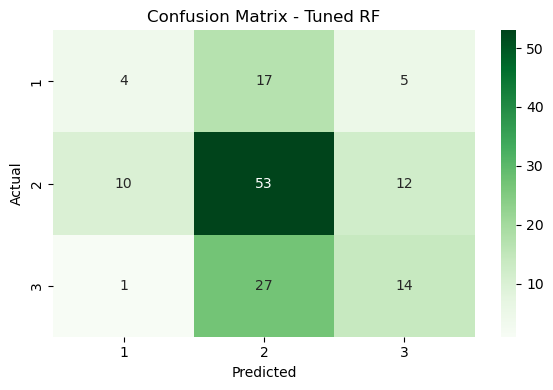

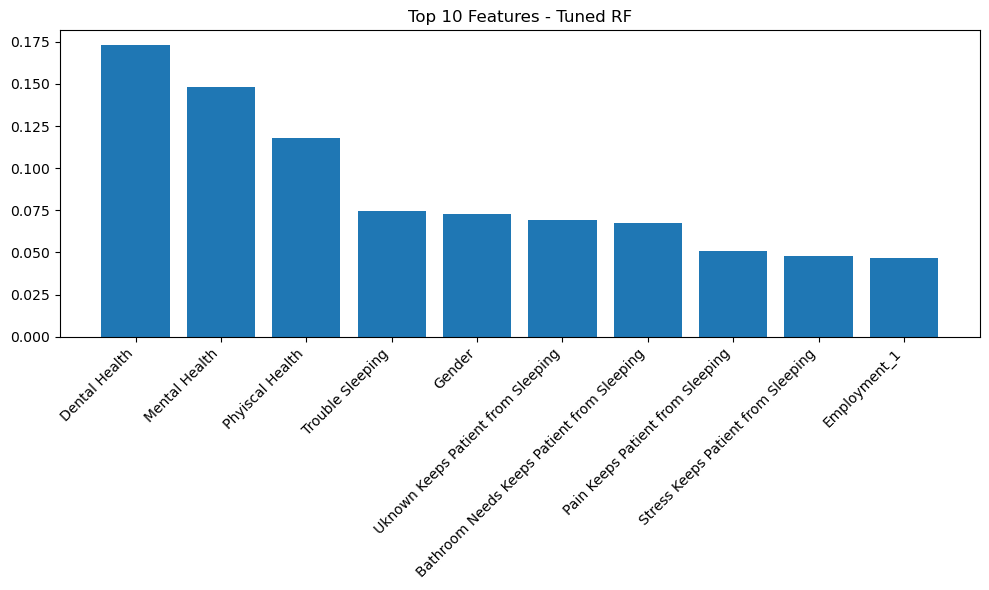

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("~/Downloads/encoded_data.csv")  
X = df.drop(columns=["Number of Doctors Visited", "Age"])
y = df["Number of Doctors Visited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Untuned Random Forest")
vanilla_rf = RandomForestClassifier(random_state=42)
vanilla_rf.fit(X_train_scaled, y_train)
y_pred_vanilla = vanilla_rf.predict(X_test_scaled)

acc_vanilla = accuracy_score(y_test, y_pred_vanilla)
f1_vanilla = f1_score(y_test, y_pred_vanilla, average='weighted')
print("Accuracy:", acc_vanilla)
print("Weighted F1 Score:", f1_vanilla)
print("Classification Report:\n", classification_report(y_test, y_pred_vanilla))

cm_vanilla = confusion_matrix(y_test, y_pred_vanilla)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_vanilla, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Vanilla RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

importances = vanilla_rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices])
plt.xticks(range(10), [X.columns[i] for i in indices], rotation=45, ha='right')
plt.title("Top 10 Features - Vanilla RF")
plt.tight_layout()
plt.show()

print("\n Tuned Random Forest (Model 2)")

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test_scaled)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_weighted = f1_score(y_test, y_pred_tuned, average='weighted')
f1_macro = f1_score(y_test, y_pred_tuned, average='macro')

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", acc_tuned)
print("Weighted F1 Score:", f1_weighted)
print("Macro F1 Score:", f1_macro)
print("Classification Report:\n", classification_report(y_test, y_pred_tuned,
                                                        target_names=["1 Doctor", "2-3 Doctors", "4+ Doctors"]))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Tuned RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices])
plt.xticks(range(10), [X.columns[i] for i in indices], rotation=45, ha='right')
plt.title("Top 10 Features - Tuned RF")
plt.tight_layout()
plt.show()



